# NLP Chatbot using Transformer BERT

**Chatbot** merupakan salah satu project aplikasi dari NLP (Natural Language Processing) yang digunakan **untuk percakapan dengan pengguna melalui teks dan ucapan**. Pada praktik ini kita akan membuat sebuah chat otomatis atau chatbot tentang keberagaman budaya dan adat istiadat yang ada di pulau Jawa.

Dalam tahapan Chatbot ini ada tahapan yang harus kita perhatikan yaitu,

1. Import Library
2. Load & Preparing Dataset
3. Preprocessing Data
4. Input Length & Output Length
5. Modeling with Bert
6. Evaluation Model Analysis
7. Testing Chatbot
8. Save The Model
9. Deploy with Gradio

Dalam proyek ini, kita akan membuat chatbot tentang keberagaman budaya yang ada di pulau Jawa!

# Import Library

## Install Package
Instalasi package sangat diperlukan ketika kita membutuhkan suatu fitur atau library yang akan kita gunakan. Pada proyek Chatbot yang akan dibuat kali ini membutuhkan package library yaitu **Speech Recognition**, **Google Text To Speech**, **Transformer**, **TorchInfo**, dan **Gradio** yang harus di install.

In [ ]:
# INSTALL PACKAGE SPEECH RECOGNITION, GOOGLE TEXT TO SPEECH, TRANSFORMER, TORCHINFO, DAN GRADIO
!pip -q install gtts speechrecognition transformers torchinfo gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 291.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.4 M

*Notes : Penginstalan dengan tanda -q maksudnya adalah mode quiet atau diam sehingga tidak mengeluarkan output saat eksekusi*

## Import Library & Package
Tahapan pertama sebelum melakukan eksplorasi dan praproses pada data adalah memasukan library yang akan digunakan untuk menganalisa dataset dengan menggunakan metode Deep Learning seperti Neural Network dalam pengolahan teks, Chatbot dll. Library yang  digunakan yaitu **NumPy** untuk komputasi matematika, **Matplotlib** untuk visualisasi model data, Natural Language Toolkit atau **NLTK** untuk pengolahan teks, **Pandas** untuk membaca data, serta **Tensorflow** untuk model pada data menggunakan algoritma LSTM (Long Short Term Memory).

In [ ]:
# PREPROCESSING
import json
import nltk
import time
import random
import string
import pickle
import re
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer

# AUDIO
from gtts import gTTS
import speech_recognition as sr
import IPython.display as ipd

# MODELLING
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
import torch.optim.lr_scheduler as lr_scheduler
from torchinfo import summary
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import transformers
from transformers import DistilBertTokenizer, DistilBertModel, DistilBertConfig

# VISUALIZAITON
import matplotlib.pyplot as plt

# Specify GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Download NLTK Package

In [ ]:
# NLTK PACKAGE
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Load & Preparing Dataset

## Preparing Data
Tahapan selanjutnya adalah me-load dataset yang telah disediakan. Dataset yang digunakan berupa format **.json** yang sangat cocok untuk membuat model Chatbot.

Data json merupakan data yang termasuk dalam *semi structured* yang dimana data ini menampung beberapa bagian data seperti tag, pattern, dan response. Data yang dipakai dalam proyek ini menggunakan dataset dari kaggle yang telah dimodifikasi. Berikut link sumbernya : https://www.kaggle.com/datasets/amadardiansyah/chatbot-keberagaman-semua-provinsi-di-indonesia

In [ ]:
# import dataset
from urllib.request import urlopen

url = "https://raw.githubusercontent.com/meinhere/nlp-chatbot/master/dataset/keberagaman.json"
content = urlopen(url)
data1 = json.loads(content.read())

# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words = [] # Data kata
classes = [] # Data Kelas atau Tag
documents = [] # Data Kalimat Dokumen
ignore_words = ['?', '!', ',', '.'] # Mengabaikan karakter spesial

# melihat semua isi data pada file .json
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    # menambahkan patterns atau pertanyaan ke dalam list
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # menambahkan class ke dalam list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns": inputs, "tags": tags})

### Show Data Head
Menampilkan data awal dari baris 1 sampai 5

In [ ]:
data.head()

,patterns,tags
0,Halo,greeting
1,Hai,greeting
2,Hola,greeting
3,Wassap,greeting
4,Yuhuu,greeting


### Show Data Describe

Menampilkan descripsi dari data seperti total data, jumlah data unik, isi data paling atas dan jumlah frekuensi

In [ ]:
data.describe()

,patterns,tags
count,112,112
unique,102,81
top,Suku bangsa apakah yang menempati provinsi Jaw...,goodbye
freq,2,9


# Preprocessing Data
Setelah meload data dan mengubah data **json** menjadi **dataframe**. Tahapan selanjutnya adalah praproses pada dataset yang kita gunakan saat ini yaitu dengan tahapan berikut :

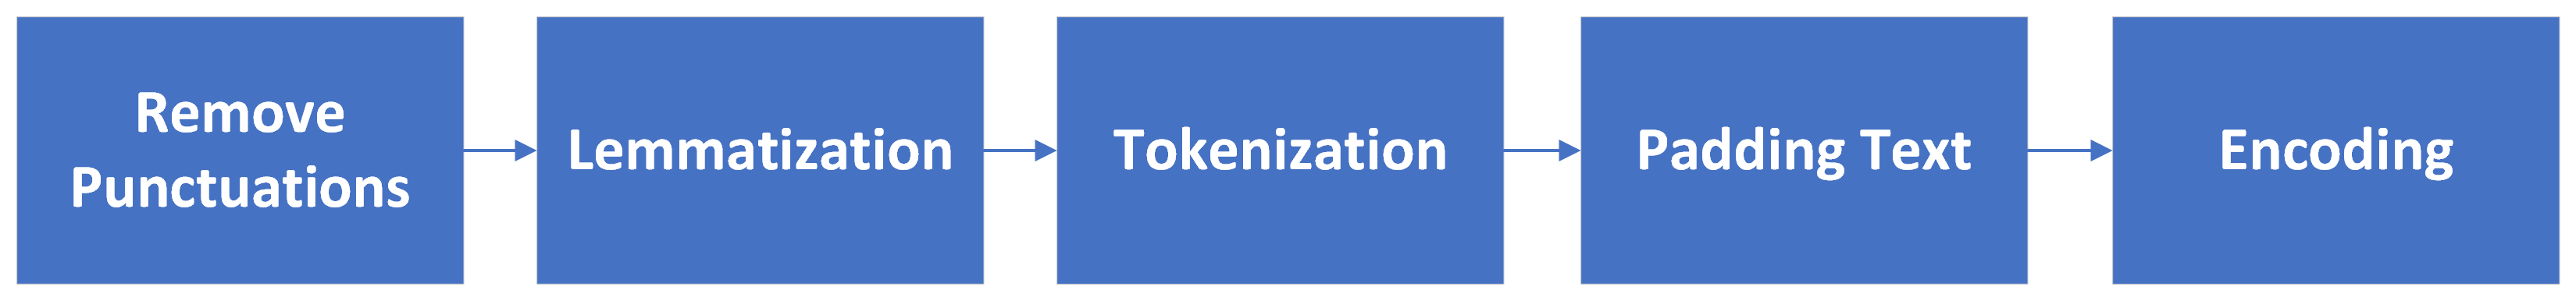

1.   Remove Punctuations (Menghapus Punktuasi)
2.   Lematization (Lematisasi)
3.   Tokenization (Tokenisasi)
4.   Apply Padding (Padding)
5.   Encoding the Outputs (Konversi Keluaran Enkoding)

## Remove Punctuations
Tahapan praproses pada data teks yang pertama adalah menghapus punktuasi atau tanda baca seperti special character yaitu **'!' (tanda seru) ',' (tanda koma) '.' (tanda titik sebagai berhenti) '?' (tanda tanya) dan tanda baca yang lain.** Tahapan ini gunanya untuk menghilangkan karakter-karakter yang tidak diperlukan sehingga mempermudah proses selanjutnya.

In [ ]:
# Remove Punctuations (Menghilangkan Punktuasi)
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

## Lemmatization
Tahapan yang kedua yaitu proses *lemmatization*. Pada proses ini dimana merujuk pada melakukan sesuatu menggunakan vocabulary atau kosakata dan analisis morfologi kata-kata untuk menghilangkan *inflectional endings only* dan untuk mengembalikan bentuk *dictionary* (kata dalam kamus) dari sebuah kata yang dikenal sebagai **lemma**.

Contoh Lematisasi : **Menggunakan** (Kata Imbuhan) -> **Guna** (Kata Dasar)

Dalam contoh berikut proses lematisasi awalnya data teks menggunakan kata imbuhan yaitu Menggunakan dimana **meng- + guna** (kata dasar yang berawalan vokal g) **+ kan** (sebagai akhiran) diubah menjadi kata dasar yaitu **'guna'**.


Proses ini dimana menghilangkan Prefiks pada imbuhan **(Meng-)** dan Suffiks pada **(-kan)**.

In [ ]:
# Lemmatization (Lematisasi)
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(words), "unique lemmatized words", words)

180 unique lemmatized words ['ada', 'adalah', 'adat', 'akan', 'alat', 'apa', 'apakah', 'badak', 'bagaimana', 'bagong', 'bahan', 'bahasa', 'bai', 'bandung', 'bangsa', 'banyak', 'barat', 'batik', 'beberapa', 'belakang', 'bentuk', 'berada', 'berapa', 'berapakah', 'berasal', 'berhabitat', 'berkomunikasi', 'berwisata', 'beskap', 'blangkon', 'buat', 'budaya', 'bumi', 'bye', 'byee', 'cerita', 'chatbot', 'ciri', 'corak', 'cult', 'dadah', 'daerah', 'dah', 'dam', 'dari', 'dengan', 'di', 'dicari', 'didaerah', 'digunakan', 'dihasilkan', 'dilindungi', 'dipakai', 'diperagakan', 'dirayakan', 'disinggahi', 'dki', 'dua', 'endemik', 'fungsi', 'gandrung', 'gerakan', 'good', 'hageng', 'hai', 'halo', 'hasil', 'hewan', 'hola', 'hubungan', 'ibu', 'ikat', 'ikon', 'indonesia', 'ini', 'istiadat', 'itu', 'jakarta', 'jarik', 'jawa', 'jejer', 'joglo', 'julukan', 'jumpa', 'kain', 'kamu', 'kapan', 'karena', 'kasih', 'keistimewaan', 'kembang', 'keragaman', 'ketika', 'keunikan', 'khas', 'kota', 'kuluk', 'lagu', 'lain'

In [ ]:
# Mengkategorikan kelas
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

81 classes ['adat_istiadat_jawa_timur', 'alat_musik_tradisional_jawa_barat', 'alat_musik_tradisional_jawa_tengah', 'apa_adat_dam_bagong', 'bahan_pakai_adat_jawa_timur', 'bahasa_daerah_jawa_tengah', 'bahasa_jawa_tengah', 'bahasa_masyarakat_jawa_barat', 'bahasa_untuk_berkomunikasi', 'banyak_pemain_tari_jejer', 'beberapa_macam_wisata_jawa_timur', 'bentuk_rumah_adat_joglo', 'berapa_macam_makan_khas_jawa_timur', 'berapa_macam_rumah_adat_jawa_timur', 'berapa_macam_suku_jawa_timur', 'blangkon', 'cerita_rakyat_dari_jawa_barat', 'cerita_rakyat_jawa_tengah', 'ciri_blangkon', 'corak_blangkon', 'dua_ikat_pada_blangkon', 'fungsi_pakaian_stagen', 'gerakan_tarian_jawa_timur', 'goodbye', 'greeting', 'hasil_bumi_di_jawa_tengah', 'hasil_bumi_jawa_barat', 'hewan_endemik_jawa_barat', 'hewan_endemik_jawa_tengah', 'hubungan_suku_jawa_timur', 'ikon_paling_terkenal_indonesia', 'julukan_kota_bandung', 'jumlah_pegujung_wisata_jawa_timur', 'kain_jawa_tengah', 'kain_khas_dari_jawa_barat', 'kapan_adat_adat_dam', '

In [ ]:
# Menampilkan jumlah documents (kombinasi antara data 'tags' dan data 'patterns' di dalam data json)
print(len(documents), "documents")

240 documents


## Tokenization (Tokenisasi)
Tahap ketiga yaitu *Tokenization*, dalam proses ini akan dilakukan suatu proses untuk memberikan urutan karakter dan sebuah unit dokumen terdefinisi. Tokenisasi juga merupakan tugas untuk memecah kalimat menjadi bagian-bagian yang disebut dengan **'Token'** dan menghilangkan bagian tertentu seperti tanda baca.
Contohnya: Aku Pergi Ke Makassar -> 'Aku' 'Pergi' 'Ke' 'Makassar'


## Padding Text
Tahap yang keempat yaitu *Padding*. Padding adalah suatu proses untuk mengubah setiap sequence agar memiliki panjang yang sama. Pada padding, setiap sequence dibuat sama panjang dengan menambahkan nilai 0 secara suffiks atau prefiks hingga mencapai panjang maksimum sequence. Selain itu padding juga dapat memotong sequence hingga panjangnya sesuai dengan panjang maksimum sequence.

Padding juga adalah proses untuk membuat setiap kalimat pada teks memiliki panjang yang seragam. Sama seperti melakukan resize gambar, agar resolusi setiap gambar sama besar.

In [ ]:
# Load the DistilBert tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
max_seq = max([len(x.split()) for x in data['patterns']])

# tokenize and encode sequences in the training set
tokens_train = tokenizer(
    data['patterns'].tolist(),
    max_length = max_seq,
    padding=True,
    truncation=True,
    return_token_type_ids=False
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

## Encoding
Tahap terakhir dari praproses data disini ialah *Encoding*. Encoding merupakan suatu konversi atau pengkodean yang dimana data kategorik seperti huruf atau data teks menjadi data numerik atau angka menyesuaikan dengan data label yang digunakan. Pada proses tahapan ini, encoding mengubah data teks pada kolom data tags menjadi data numerik dengan bahasa biner komputer yaitu 0 dan 1.

Tujuan dari encoding ini adalah mempermudah saat proses komputasi data teks dan modelling.

In [ ]:
# Melakukan konversi data label tags dengan encoding
le = LabelEncoder()
data['tags'] = le.fit_transform(data['tags'])
data['tags'].value_counts(normalize = True)

tags
23    0.080357
24    0.053571
75    0.044643
40    0.026786
54    0.026786
        ...   
31    0.008929
73    0.008929
70    0.008929
53    0.008929
65    0.008929
Name: proportion, Length: 81, dtype: float64

# Input Length and Output Length
**Input length** dan **output length** adalah bentuk input dan bentuk output dari data train yang akan diproses pada algoritma LSTM yang akan dilatih.

<Axes: >

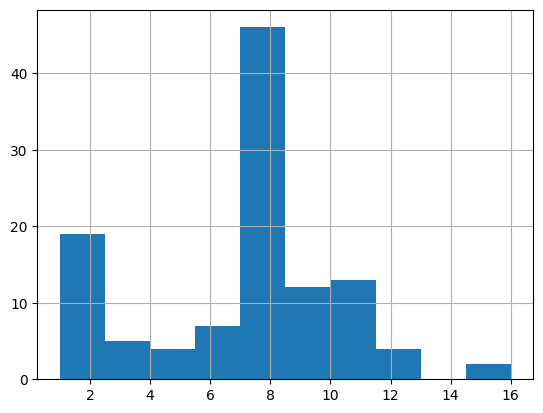

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in data['patterns']]
pd.Series(seq_len).hist(bins = 10)

## Input Length

In [ ]:
# Melihat hasil input pada data teks
input_shape = max_seq
print("input length: ", input_shape)

input length:  16


## Output Length


In [ ]:
# Melakukan pemeriksaan pada data output label teks
output_length = le.classes_.shape[0]
print("output length: ", output_length)

output length:  81


## Save Result With Pickle

In [ ]:
# Simpan hasil pemrosesan teks dengan menggunakan pickle
pickle.dump(words, open('words.pkl','wb')) # simpan kata
pickle.dump(classes, open('classes.pkl','wb')) # simpan kelas
pickle.dump(le, open('le.pkl','wb')) # simpan label encoder
pickle.dump(tokenizer, open('tokenizers.pkl','wb')) # simpan tokenizer

# Modeling

In [ ]:
# Import the DistilBert pretrained model
bert = DistilBertModel.from_pretrained('distilbert-base-uncased')
# Set data labels
labels_train = data['tags']

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(labels_train.tolist())

In [ ]:
#define a batch size
batch_size = 4
# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)
# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)
# DataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

In [ ]:
class BERT_Arch(nn.Module):
   def __init__(self, bert):
       super(BERT_Arch, self).__init__()
       self.bert = bert

       # dropout layer
       self.dropout = nn.Dropout(0.2)

       # relu activation function
       self.relu =  nn.ReLU()
       # dense layer
       self.fc1 = nn.Linear(768,512)
       self.fc2 = nn.Linear(512,256)
       self.fc3 = nn.Linear(256,output_length)
       #softmax activation function
       self.softmax = nn.LogSoftmax(dim=1)
       #define the forward pass
   def forward(self, sent_id, mask):
      #pass the inputs to the model
      bert_output = self.bert(sent_id, attention_mask=mask)
      cls_hs = bert_output[0][:,0]

      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)

      x = self.fc2(x)
      x = self.relu(x)
      x = self.dropout(x)
      # output layer
      x = self.fc3(x)

      # apply softmax activation
      x = self.softmax(x)
      return x

In [ ]:
# freeze all the parameters. This will prevent updating of model weights during fine-tuning.
for param in bert.parameters():
      param.requires_grad = False
model = BERT_Arch(bert)
# push the model to GPU
model = model.to(device)

summary(model)

Layer (type:depth-idx)                                  Param #
BERT_Arch                                               --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              (23,440,896)
│    │    └─Embedding: 3-2                              (393,216)
│    │    └─LayerNorm: 3-3                              (1,536)
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             (42,527,232)
├─Dropout: 1-2                                          --
├─ReLU: 1-3                                             --
├─Linear: 1-4                                           393,728
├─Linear: 1-5                                           131,328
├─Linear: 1-6                                           20,817
├─LogSoftmax: 1-7                                       --
Total

In [ ]:
#compute the class weights
class_wts = compute_class_weight('balanced', classes = np.unique(labels_train), y = labels_train)
print(class_wts)

# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)
# loss function
cross_entropy = nn.NLLLoss(weight=weights)

[1.38271605 0.69135802 1.38271605 1.38271605 1.38271605 1.38271605
 1.38271605 0.69135802 1.38271605 1.38271605 1.38271605 1.38271605
 1.38271605 1.38271605 1.38271605 1.38271605 1.38271605 1.38271605
 1.38271605 1.38271605 1.38271605 1.38271605 1.38271605 0.15363512
 0.23045267 1.38271605 1.38271605 0.69135802 1.38271605 1.38271605
 1.38271605 1.38271605 1.38271605 1.38271605 1.38271605 1.38271605
 1.38271605 1.38271605 1.38271605 0.69135802 0.46090535 0.69135802
 0.69135802 1.38271605 1.38271605 1.38271605 1.38271605 1.38271605
 1.38271605 1.38271605 0.69135802 0.69135802 1.38271605 1.38271605
 0.46090535 1.38271605 1.38271605 1.38271605 1.38271605 1.38271605
 1.38271605 0.69135802 1.38271605 1.38271605 1.38271605 1.38271605
 0.69135802 1.38271605 1.38271605 1.38271605 1.38271605 1.38271605
 1.38271605 1.38271605 1.38271605 0.27654321 1.38271605 1.38271605
 1.38271605 1.38271605 1.38271605]


In [ ]:
# define the optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr = 1e-3)

# number of training epochs
epochs = 300
# We can also use learning rate scheduler to achieve better results
lr_sch = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [ ]:
# function to train the model
def train():
    model.train()
    total_loss = 0
    total_preds = []
    total_labels = []

    # iterate over batches
    for step, batch in enumerate(train_dataloader):

        # progress update after every 50 batches
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss += loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the gradients to 1.0 to prevent the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # clear calculated gradients
        optimizer.zero_grad()

        # model predictions are stored on GPU, so push them to CPU
        preds = preds.detach().cpu().numpy()
        labels = labels.detach().cpu().numpy()

        # append the model predictions and true labels
        total_preds.append(preds)
        total_labels.append(labels)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

    # reshape the predictions and true labels to (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    total_labels = np.concatenate(total_labels, axis=0)

    # calculate accuracy
    pred_labels = np.argmax(total_preds, axis=1)
    accuracy = accuracy_score(total_labels, pred_labels)

    # return the loss and accuracy
    return avg_loss, accuracy

In [ ]:
# empty lists to store training and validation loss of each epoch
history = {'accuracy': [], 'loss': []}

for epoch in range(epochs):

    print(f'Epoch {epoch+1}/{epochs}')

    #train model
    loss, accuracy = train()

    # append training and validation loss
    history['accuracy'].append(accuracy)
    history['loss'].append(loss)

    # it can make your experiment reproducible, similar to set  random seed to all options where there needs a random seed.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print('[' + '='*30 + '] - ', end="")
    print(f'loss: {loss:.4f} - accuracy: {accuracy:.4f}')

Epoch 1/300
[==============================] - loss: 4.5240 - accuracy: 0.0000
Epoch 2/300
[==============================] - loss: 4.4289 - accuracy: 0.0357
Epoch 3/300
[==============================] - loss: 4.4076 - accuracy: 0.0714
Epoch 4/300
[==============================] - loss: 4.3679 - accuracy: 0.0804
Epoch 5/300
[==============================] - loss: 4.3069 - accuracy: 0.0893
Epoch 6/300
[==============================] - loss: 4.2591 - accuracy: 0.0804
Epoch 7/300
[==============================] - loss: 4.1575 - accuracy: 0.0804
Epoch 8/300
[==============================] - loss: 4.1701 - accuracy: 0.0268
Epoch 9/300
[==============================] - loss: 4.1237 - accuracy: 0.0804
Epoch 10/300
[==============================] - loss: 4.0728 - accuracy: 0.1161
Epoch 11/300
[==============================] - loss: 3.9855 - accuracy: 0.0625
Epoch 12/300
[==============================] - loss: 3.9304 - accuracy: 0.1071
Epoch 13/300
[==============================] - l

# Evaluation Model Analysis
Setelah menjalankan pelatihan model dengan Transformer Bert serta telah mengetahui hasil akurasi pada step terakhir. Maka, tahapan selanjutnya adalah menganalisa model dengan visualisasi plot akurasi dan loss untuk melihat hasil akurasi pelatihan model tersebut.

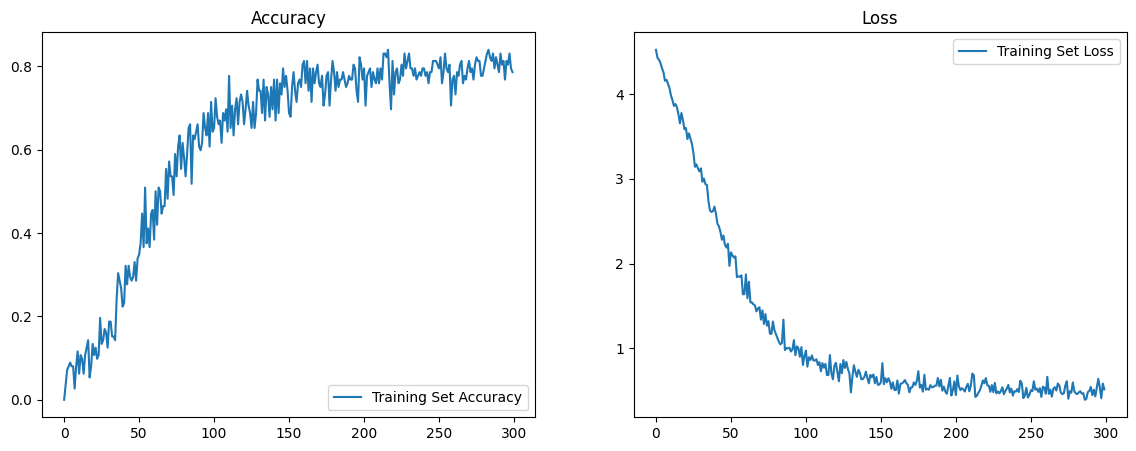

In [ ]:
# Plotting model Accuracy and Loss (Visualisasi Plot Hasil Akurasi dan Loss)
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

# Testing Chatbot
Setelah mengetahui hasil dari akurasi dan loss pada model yang telah ditetapkan. Maka, tahapan selanjutnya adalah menguji atau testing pada chatbot yang telah dilatih sebelumnya dan melihat apakah sesuai atau tidak pada saat kita masukan teks kalimat pertanyaannya.

Pada pengujian ini menggunakan metode input atau masukan sesuai dengan kalimat pertanyaan yang dimasukkan.

In [ ]:
def get_prediction(inp):
  inp = [letters.lower() for letters in inp if letters not in string.punctuation]
  inp = ''.join(inp)
  inp = re.sub(r'[^a-zA-Z ]+', '', inp)
  test_text = [inp]
  model.eval()

  tokens_test_data = tokenizer(
    test_text,
    max_length = max_seq,
    padding=True,
    truncation=True,
    return_token_type_ids=False
  )
  test_seq = torch.tensor(tokens_test_data['input_ids'])
  test_mask = torch.tensor(tokens_test_data['attention_mask'])

  preds = None
  with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()
  preds = np.argmax(preds, axis = 1)
  return le.inverse_transform(preds)[0]

def get_response(message):
  intent = get_prediction(message)
  for i in data1['intents']:
    if i["tag"] == intent:
      result = random.choice(i["responses"])
      break
  print("🤖 Response : ", result)
  # Tambahkan suara bot dengan Google Text to Speech
  tts = gTTS(result, lang='id')
  # Simpan model voice bot ke dalam Google Drive dengan format .wav
  tts.save('CultBot.wav')
  # Atur waktu jeda sampai 8 detik
  time.sleep(0.08)
  # Ambil file model yang telah disimpan sebelumnya
  ipd.display(ipd.Audio('/content/CultBot.wav', autoplay=False))
  print("="*60 + "\n")
  return intent

def get_response2(message, history):
  intent = get_prediction(message)
  for i in data1['intents']:
    if i["tag"] == intent:
      result = random.choice(i["responses"])
      break
  print("🤖 Response : ", result)
  return result

In [ ]:
run = True

while run:
  inp = input("👨‍🦰 Input : ")
  inp = get_response(inp)

  if inp == "goodbye" or inp == "terimakasih":
    run = False

👨‍🦰 Input : bye
🤖 Response :  Good bye!


# Save The Model
Setelah pengujian Chatbot telah disesuaikan dengan kalimat dan jawabannya. Maka, model chatbot bisa disimpan dengan format .h5 atau .pkl (pickle) untuk penggunaan aplikasi AI Chatbot dengan website atau sistem Android. Penyimpanan file model bisa langsung secara transient file lokal komputer atau bisa taruh dalam cloud storage di Google Drive.

In [ ]:
def save_model(model, optimizer, epoch, save_dir="saved_models"):
  """
  Saves the model, optimizer state, and current epoch to a checkpoint file.

  Args:
      model (nn.Module): The PyTorch model to save.
      optimizer (torch.optim.Optimizer): The optimizer used for training.
      epoch (int): The current training epoch.
      save_dir (str, optional): The directory to save the checkpoint file. Defaults to "saved_models".
  """

  # Create the save directory if it doesn't exist
  import os
  if not os.path.exists(save_dir):
    os.makedirs(save_dir)

  # Construct a filename with epoch number for version control
  filename = f"bert_model_epoch_{epoch}.pt"
  filepath = os.path.join(save_dir, filename)

  # Save the model state dictionary, optimizer state, and current epoch
  state = {
      "model_state_dict": model.state_dict(),
      "optimizer_state_dict": optimizer.state_dict(),
      "epoch": epoch,
  }
  torch.save(state, filepath)

  print(f"Model saved to: {filepath}")

In [ ]:
# Simpan model dalam bentuk format file .h5 atau .pkl (pickle)
save_model(model, optimizer, epochs)

print('Model Created Successfully!')

Model saved to: saved_models/bert_model_epoch_300.pt
Model Created Successfully!


# Deploy Chatbot with Gradio

In [ ]:
import gradio as gr
gr.ChatInterface(get_response2).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ac73c0c9de821c1fc8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
